In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pytz
import numpy as np

In [2]:
path_to_ch4_diffusive = 'CH4_diffusive.csv'
path_to_ch4_ebullitive = 'CH4_ebullitive.csv'
path_to_co2_diffusive = 'CO2_diffusive.csv'
path_to_co2_ebullitive = 'CO2_ebullitive.csv'

ch4_diffusive = pd.read_csv(path_to_ch4_diffusive, parse_dates=['datetime_start','datetime_end'])
ch4_ebullitive = pd.read_csv(path_to_ch4_ebullitive, parse_dates=['datetime_start','datetime_end'])
co2_diffusive = pd.read_csv(path_to_co2_diffusive, parse_dates=['datetime_start','datetime_end'])
co2_ebullitive = pd.read_csv(path_to_co2_ebullitive, parse_dates=['datetime_start','datetime_end'])

/var/folders/43/1q0jr07n42bgcz2_24kkbtgr0000gp/T/ipykernel_3600/1693317217.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ch4_diffusive = pd.read_csv(path_to_ch4_diffusive, parse_dates=['datetime_start','datetime_end'])
/var/folders/43/1q0jr07n42bgcz2_24kkbtgr0000gp/T/ipykernel_3600/1693317217.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ch4_diffusive = pd.read_csv(path_to_ch4_diffusive, parse_dates=['datetime_start','datetime_end'])
/var/folders/43/1q0jr07n42bgcz2_24kkbtgr0000gp/T/ipykernel_3600/1693317217.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ch4

In [22]:
#ch4_diffusive['datetime_start'] = ch4_diffusive['datetime_start'].dt.tz_localize(pytz.timezone('Etc/GMT+8'))
#ch4_diffusive['datetime_start'] = ch4_diffusive['datetime_start'].dt.tz_convert(pytz.timezone('Etc/GMT+9'))
ch4_diffusive.columns

Index(['flux', 'chamber', 'pond', 'datetime_start', 'datetime_end',
       'slope_ppm_hr', 'n_obs_included_in_lm', 'r2', 'air_temp',
       'sur_wat_temp', 'umol_m2_hr', 'mmol_m2_hr', 'date', 'time', 'time24'],
      dtype='object')

In [3]:
# calculate daily fluxes for CH4 diffusion
ch4_diffusive.loc[ch4_diffusive['umol_m2_hr']<0, 'umol_m2_hr'] = np.nan
ch4_diffusive['integ_time_hr'] = (ch4_diffusive['datetime_end'] - ch4_diffusive['datetime_start']).dt.total_seconds() / 3600
ch4_diffusive['umol_m2'] = ch4_diffusive['umol_m2_hr'] * ch4_diffusive['integ_time_hr']

ch4_diffusive['date'] = ch4_diffusive['datetime_end'].dt.date

ch4_diffusive_daily = ch4_diffusive.groupby(by=['pond', 'chamber', 'date']).aggregate({
                                                'slope_ppm_hr': 'mean',
                                                'r2': 'mean', 
                                                'air_temp': 'mean', #C
                                                'sur_wat_temp': 'mean', #C
                                                'umol_m2_hr': 'mean', #mm
                                                'umol_m2': lambda x: x.sum(skipna=False)
                                                }).reset_index()

ch4_diffusive_daily['umol_m2_d'] = ch4_diffusive_daily['umol_m2_hr'] * 24
ch4_diffusive_daily['mg_m2_d'] = ch4_diffusive_daily['umol_m2_d']*0.01604
ch4_diffusive_daily['mg_m2_d_v2'] = ch4_diffusive_daily['umol_m2']*0.01604

ch4_diffusive_daily_chamber_avg = ch4_diffusive_daily.groupby(by=['pond', 'date']).aggregate({
                                                'slope_ppm_hr': 'mean',
                                                'r2': 'mean', 
                                                'air_temp': 'mean', #C
                                                'sur_wat_temp': 'mean', #C
                                                'mg_m2_d': 'mean', #mm
                                                }).reset_index()

In [4]:
# calculate daily fluxes for CH4 ebullition
ch4_ebullitive.loc[ch4_ebullitive['umol_m2_hr']<0, 'umol_m2_hr'] = np.nan
ch4_ebullitive['integ_time_hr'] = (ch4_ebullitive['datetime_end'] - ch4_ebullitive['datetime_start']).dt.total_seconds() / 3600
ch4_ebullitive['umol_m2'] = ch4_ebullitive['umol_m2_hr'] * ch4_ebullitive['integ_time_hr']

ch4_ebullitive['date'] = ch4_ebullitive['datetime_end'].dt.date

ch4_ebullitive_daily = ch4_ebullitive.groupby(by=['pond', 'chamber', 'date']).aggregate({ 
                                                'air_temp': 'mean', #C
                                                'sur_wat_temp': 'mean', #C
                                                'umol_m2_hr': 'mean', #mm
                                                'umol_m2': lambda x: x.sum(skipna=False)
                                                }).reset_index()

ch4_ebullitive_daily['umol_m2_d'] = ch4_ebullitive_daily['umol_m2_hr'] * 24
ch4_ebullitive_daily['mg_m2_d'] = ch4_ebullitive_daily['umol_m2_d']*0.01604
ch4_ebullitive_daily['mg_m2_d_v2'] = ch4_ebullitive_daily['umol_m2']*0.01604

In [5]:
# calculate daily fluxes for CO2 diffusion
co2_diffusive.loc[co2_diffusive['umol_m2_hr']<0, 'umol_m2_hr'] = np.nan
co2_diffusive['integ_time_hr'] = (co2_diffusive['datetime_end'] - co2_diffusive['datetime_start']).dt.total_seconds() / 3600
co2_diffusive['umol_m2'] = co2_diffusive['umol_m2_hr'] * co2_diffusive['integ_time_hr']

co2_diffusive['date'] = co2_diffusive['datetime_end'].dt.date

co2_diffusive_daily = co2_diffusive.groupby(by=['pond', 'chamber', 'date']).aggregate({
                                                'slope_ppm_hr': 'mean',
                                                'r2': 'mean', 
                                                'air_temp': 'mean', #C
                                                'sur_wat_temp': 'mean', #C
                                                'umol_m2_hr': 'mean', #mm
                                                'umol_m2': lambda x: x.sum(skipna=False)
                                                }).reset_index()

co2_diffusive_daily['umol_m2_d'] = co2_diffusive_daily['umol_m2_hr'] * 24
co2_diffusive_daily['mg_m2_d'] = co2_diffusive_daily['umol_m2_d']*0.01604
co2_diffusive_daily['mg_m2_d_v2'] = co2_diffusive_daily['umol_m2']*0.01604

co2_diffusive_daily_chamber_avg = co2_diffusive_daily.groupby(by=['pond', 'date']).aggregate({
                                                'slope_ppm_hr': 'mean',
                                                'r2': 'mean', 
                                                'air_temp': 'mean', #C
                                                'sur_wat_temp': 'mean', #C
                                                'mg_m2_d': 'mean', #mm
                                                }).reset_index()

In [6]:
# calculate daily fluxes for CO2 ebullition
co2_ebullitive.loc[co2_ebullitive['umol_m2_hr']<0, 'umol_m2_hr'] = np.nan
co2_ebullitive['integ_time_hr'] = (co2_ebullitive['datetime_end'] - co2_ebullitive['datetime_start']).dt.total_seconds() / 3600
co2_ebullitive['umol_m2'] = co2_ebullitive['umol_m2_hr'] * co2_ebullitive['integ_time_hr']

co2_ebullitive['date'] = co2_ebullitive['datetime_end'].dt.date

co2_ebullitive_daily = co2_ebullitive.groupby(by=['pond', 'chamber', 'date']).aggregate({ 
                                                'air_temp': 'mean', #C
                                                'sur_wat_temp': 'mean', #C
                                                'umol_m2_hr': 'mean', #mm
                                                'umol_m2': lambda x: x.sum(skipna=False)
                                                }).reset_index()

co2_ebullitive_daily['umol_m2_d'] = co2_ebullitive_daily['umol_m2_hr'] * 24
co2_ebullitive_daily['mg_m2_d'] = co2_ebullitive_daily['umol_m2_d']*0.01604
co2_ebullitive_daily['mg_m2_d_v2'] = co2_ebullitive_daily['umol_m2']*0.01604

In [40]:
ch4_diffusive_daily['pond'].unique()

array(['B', 'U'], dtype=object)

Text(0.5, 0.98, 'CH4 Diffusive Flux: Pond B and Pond U Over Time')

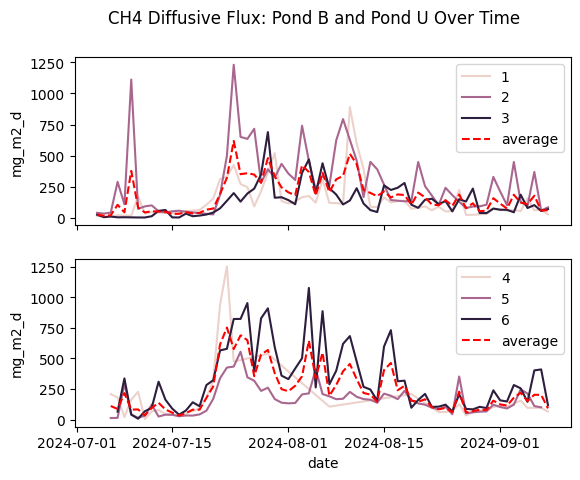

In [15]:
fig, axes=plt.subplots(2,1, sharex=True)

sns.lineplot(data=ch4_diffusive_daily.loc[ch4_diffusive_daily['pond']=='B'], x='date', y='mg_m2_d', hue='chamber', ax=axes[0])
sns.lineplot(data = ch4_diffusive_daily_chamber_avg.loc[ch4_diffusive_daily_chamber_avg['pond']=='B'], x='date', y='mg_m2_d', ax=axes[0], color='red', linestyle='--', label='average')

sns.lineplot(data=ch4_diffusive_daily.loc[ch4_diffusive_daily['pond']=='U'], x='date', y='mg_m2_d', hue='chamber', ax=axes[1])
sns.lineplot(data = ch4_diffusive_daily_chamber_avg.loc[ch4_diffusive_daily_chamber_avg['pond']=='U'], x='date', y='mg_m2_d', ax=axes[1], color='red', linestyle='--', label='average')
fig.suptitle('CH4 Diffusive Flux: Pond B and Pond U Over Time')

Text(0.5, 0.98, 'CH4 Ebullitive Flux: Pond B and Pond U Over Time')

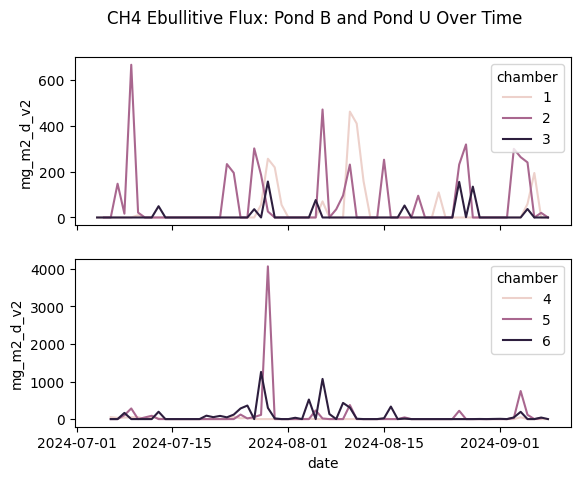

In [13]:
fig, axes=plt.subplots(2,1, sharex=True)
sns.lineplot(data=ch4_ebullitive_daily.loc[ch4_ebullitive_daily['pond']=='B'], x='date', y='mg_m2_d_v2', hue='chamber', ax=axes[0])
sns.lineplot(data=ch4_ebullitive_daily.loc[ch4_ebullitive_daily['pond']=='U'], x='date', y='mg_m2_d_v2', hue='chamber', ax=axes[1])
fig.suptitle('CH4 Ebullitive Flux: Pond B and Pond U Over Time')

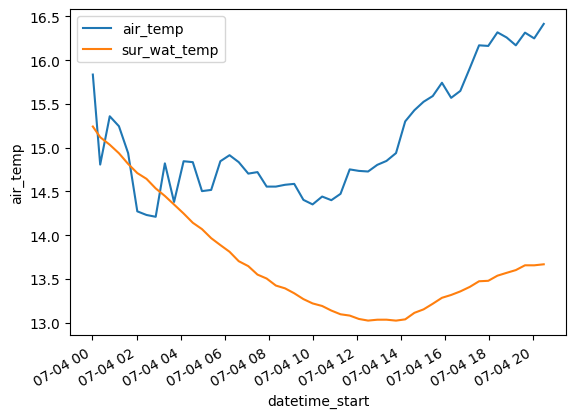

In [21]:
fig, axes=plt.subplots()
sns.lineplot(data=test, x='datetime_start', y='air_temp', label='air_temp')
sns.lineplot(data=test, x='datetime_start', y='sur_wat_temp', label='sur_wat_temp')
fig.autofmt_xdate()

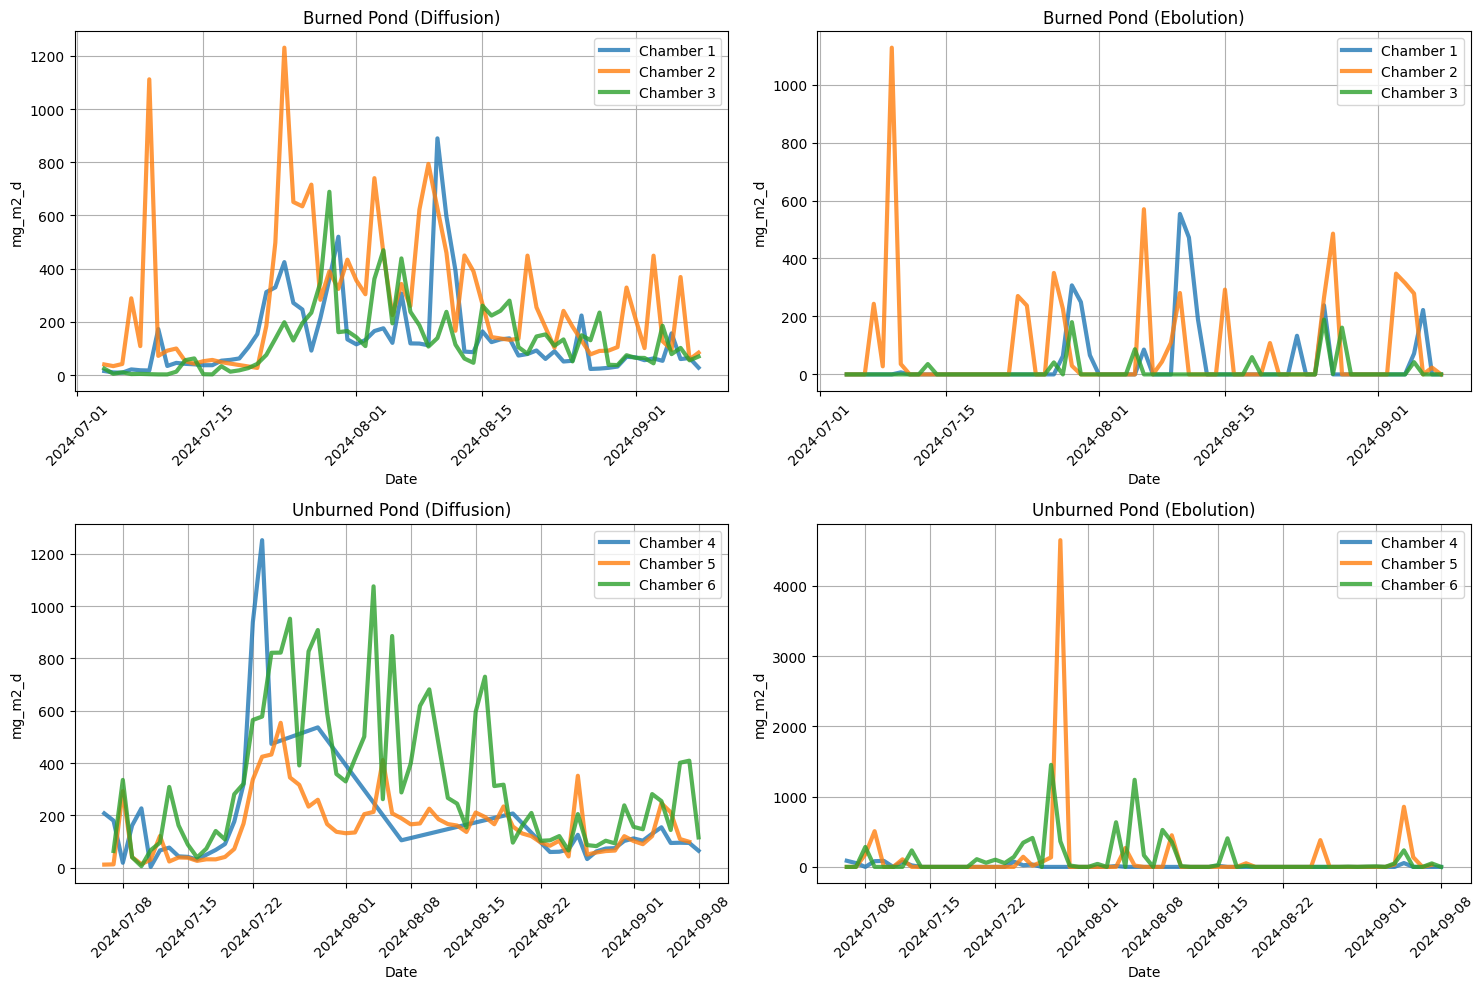

In [16]:
def plot_fluxes_subplots(data_d,data_e):
    # Convert 'date' column to datetime format for proper plotting
    data_d['date'] = pd.to_datetime(data_d['date'], errors='coerce')
    data_e['date'] = pd.to_datetime(data_e['date'], errors='coerce')

    # Define filters for the plots
    filter_d_B1 = (data_d['pond'] == 'B') & (data_d['chamber'] == 1)
    filter_d_B2 = (data_d['pond'] == 'B') & (data_d['chamber'] == 2)
    filter_d_B3 = (data_d['pond'] == 'B') & (data_d['chamber'] == 3)

    filter_e_B1 = (data_e['pond'] == 'B') & (data_e['chamber'] == 1)
    filter_e_B2 = (data_e['pond'] == 'B') & (data_e['chamber'] == 2)
    filter_e_B3 = (data_e['pond'] == 'B') & (data_e['chamber'] == 3)

    filter_d_U4 = (data_d['pond'] == 'U') & (data_d['chamber'] == 4)
    filter_d_U5 = (data_d['pond'] == 'U') & (data_d['chamber'] == 5)
    filter_d_U6 = (data_d['pond'] == 'U') & (data_d['chamber'] == 6)

    filter_e_U4 = (data_e['pond'] == 'U') & (data_e['chamber'] == 4)
    filter_e_U5 = (data_e['pond'] == 'U') & (data_e['chamber'] == 5)
    filter_e_U6 = (data_e['pond'] == 'U') & (data_e['chamber'] == 6)

    # Create subplots (2x2)
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Plot for Pond B (Chamber 1, 2, and 3)
    axes[0, 0].plot(data_d[filter_d_B1]['date'], data_d[filter_d_B1]['mg_m2_d'],lw='3', alpha=0.8, linestyle='-', label='Chamber 1')
    axes[0, 0].plot(data_d[filter_d_B2]['date'], data_d[filter_d_B2]['mg_m2_d'],lw='3', alpha=0.8,linestyle='-', label='Chamber 2')
    axes[0, 0].plot(data_d[filter_d_B3]['date'], data_d[filter_d_B3]['mg_m2_d'],lw='3', alpha=0.8,linestyle='-', label='Chamber 3')
    axes[0, 0].set_title("Burned Pond (Diffusion)")
    axes[0, 0].set_xlabel("Date")
    axes[0, 0].set_ylabel("mg_m2_d")
    axes[0, 0].legend()
    axes[0, 0].grid(True)
    axes[0, 0].tick_params(axis='x', rotation=45)

    # Plot for Pond B (Chamber 1, 2, and 3)
    axes[0, 1].plot(data_e[filter_e_B1]['date'], data_e[filter_e_B1]['mg_m2_d'],lw='3', alpha=0.8, linestyle='-', label='Chamber 1')
    axes[0, 1].plot(data_e[filter_e_B2]['date'], data_e[filter_e_B2]['mg_m2_d'],lw='3', alpha=0.8, linestyle='-', label='Chamber 2')
    axes[0, 1].plot(data_e[filter_e_B3]['date'], data_e[filter_e_B3]['mg_m2_d'],lw='3', alpha=0.8, linestyle='-', label='Chamber 3')
    #axes[0, 1].plot(data[filter_U4]['date'], data[filter_U4]['mg_m2_d'], marker='o', linestyle='-', label='Chamber 4')
    axes[0, 1].set_title("Burned Pond (Ebolution)")
    axes[0, 1].set_xlabel("Date")
    axes[0, 1].set_ylabel("mg_m2_d")
    axes[0, 1].legend()
    axes[0, 1].grid(True)
    axes[0, 1].tick_params(axis='x', rotation=45)

    # Plot for Pond U (Chamber 5)
    axes[1, 0].plot(data_d[filter_d_U4]['date'], data_d[filter_d_U4]['mg_m2_d'],lw='3', alpha=0.8, linestyle='-', label='Chamber 4')
    axes[1, 0].plot(data_d[filter_d_U5]['date'], data_d[filter_d_U5]['mg_m2_d'],lw='3', alpha=0.8, linestyle='-', label='Chamber 5')
    axes[1, 0].plot(data_d[filter_d_U6]['date'], data_d[filter_d_U6]['mg_m2_d'],lw='3', alpha=0.8, linestyle='-', label='Chamber 6')
 
    axes[1, 0].set_title("Unburned Pond (Diffusion)")
    axes[1, 0].set_xlabel("Date")
    axes[1, 0].set_ylabel("mg_m2_d")
    axes[1, 0].legend()
    axes[1, 0].grid(True)
    axes[1, 0].tick_params(axis='x', rotation=45)

    # Plot for Pond U (Chamber 6)
    axes[1, 1].plot(data_e[filter_e_U4]['date'], data_e[filter_e_U4]['mg_m2_d'], lw='3', alpha=0.8,linestyle='-', label='Chamber 4')
    axes[1, 1].plot(data_e[filter_e_U5]['date'], data_e[filter_e_U5]['mg_m2_d'], lw='3', alpha=0.8,linestyle='-', label='Chamber 5')
    axes[1, 1].plot(data_e[filter_e_U6]['date'], data_e[filter_e_U6]['mg_m2_d'], lw='3', alpha=0.8,linestyle='-', label='Chamber 6')
    axes[1, 1].set_title("Unburned Pond (Ebolution)")
    axes[1, 1].set_xlabel("Date")
    axes[1, 1].set_ylabel("mg_m2_d")
    axes[1, 1].legend()
    axes[1, 1].grid(True)
    axes[1, 1].tick_params(axis='x', rotation=45)

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Call the function with the loaded data
plot_fluxes_subplots(ch4_diffusive_daily,ch4_ebullitive_daily)


/var/folders/43/1q0jr07n42bgcz2_24kkbtgr0000gp/T/ipykernel_3600/1733272653.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(cumulative_data, labels=labels, patch_artist=True)
/var/folders/43/1q0jr07n42bgcz2_24kkbtgr0000gp/T/ipykernel_3600/1733272653.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(cumulative_data, labels=labels, patch_artist=True)
/var/folders/43/1q0jr07n42bgcz2_24kkbtgr0000gp/T/ipykernel_3600/1733272653.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(cumulative_data, labels=labels, patch_artist=True)
/var/folders/43/1q0jr07n42bgcz2_24kkb

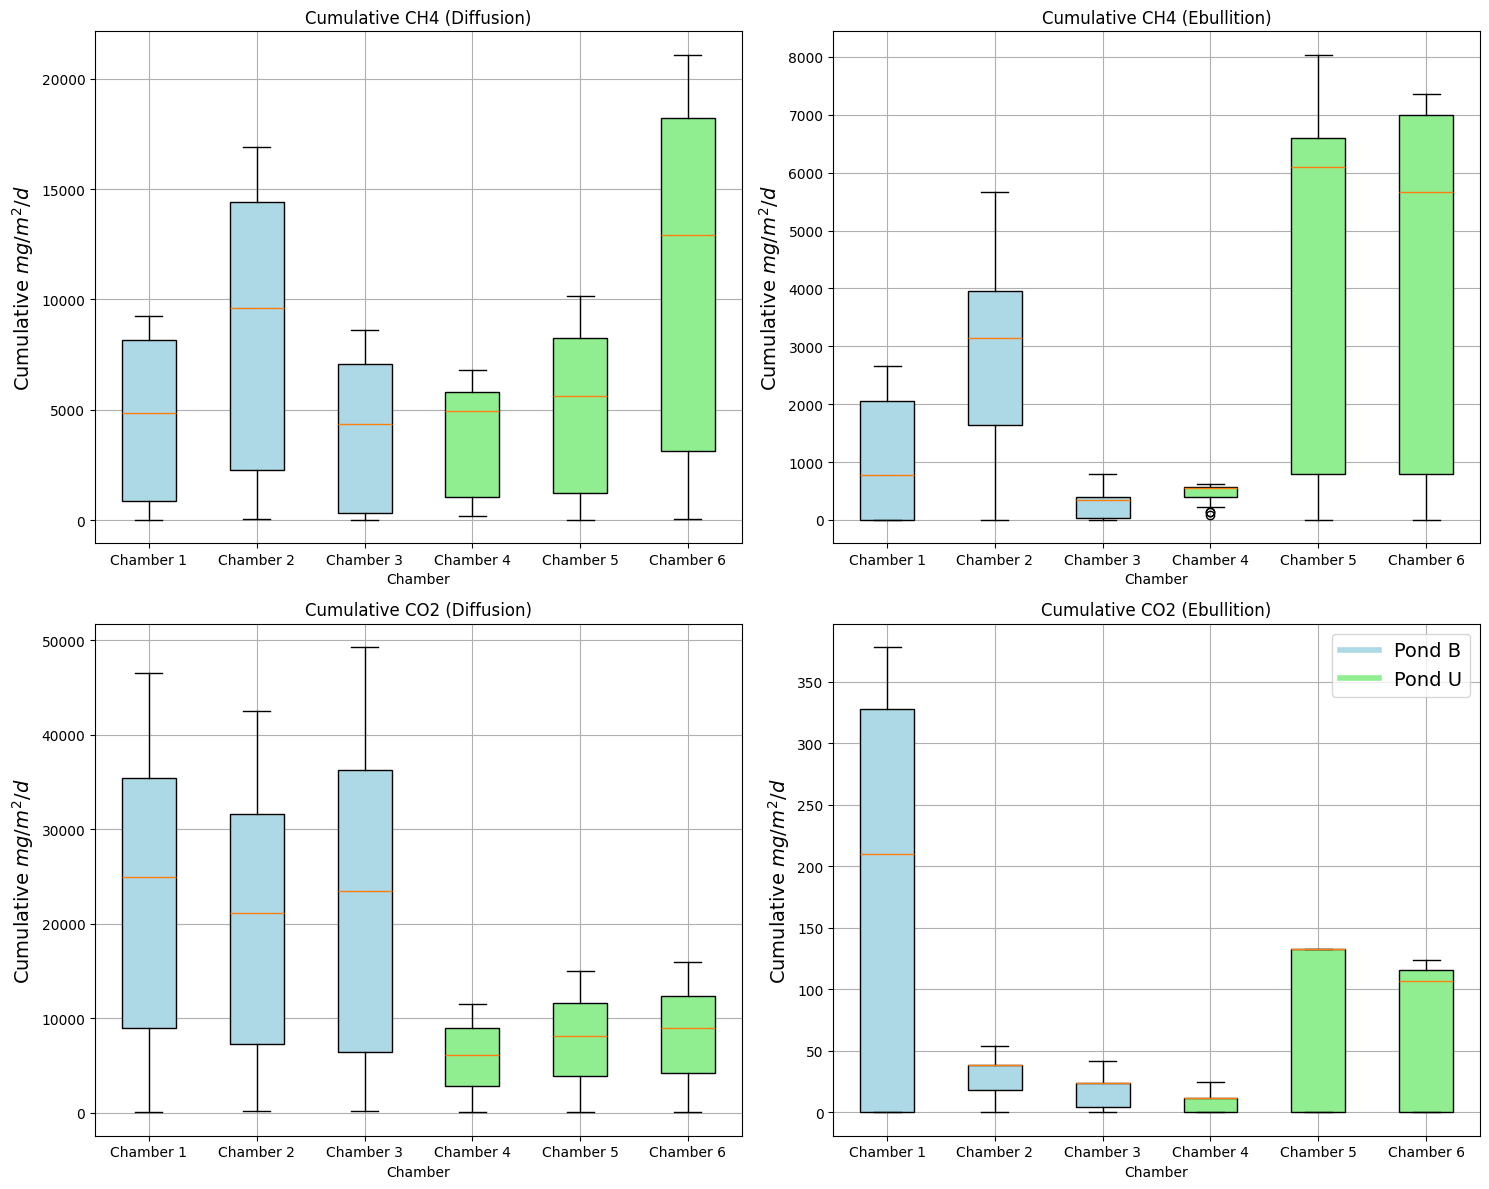

In [17]:
# Define a function to create 2x2 subplots using the existing plot_cumulative_boxplot_with_legend logic for multiple datasets
def plot_cumulative_boxplot_2x2(data_list, titles):
    # Set up a 2x2 subplot layout
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    pond_B_color = 'lightblue'
    pond_U_color = 'lightgreen'
    
    # Iterate over the subplots and datasets
    for ax, data, title in zip(axes.flatten(), data_list, titles):
        # Convert 'date' column to datetime format for proper sorting and aggregation
        data['date'] = pd.to_datetime(data['date'], errors='coerce')
        
        # Define lists to hold cumulative data and labels for each pond and chamber
        pond_B_chambers = [1, 2, 3]
        pond_U_chambers = [4, 5, 6]

        cumulative_data = []
        labels = []
        colors = []

        # Collect cumulative data and labels for Pond 'B'
        for chamber in pond_B_chambers:
            chamber_data = data[(data['pond'] == 'B') & (data['chamber'] == chamber)].sort_values(by='date')
            chamber_data['cumulative_mg_m2_d'] = chamber_data['mg_m2_d'].cumsum()
            cumulative_data.append(chamber_data['cumulative_mg_m2_d'].dropna())
            labels.append(f"Chamber {chamber}")
            colors.append(pond_B_color)

        # Collect cumulative data and labels for Pond 'U'
        for chamber in pond_U_chambers:
            chamber_data = data[(data['pond'] == 'U') & (data['chamber'] == chamber)].sort_values(by='date')
            chamber_data['cumulative_mg_m2_d'] = chamber_data['mg_m2_d'].cumsum()
            cumulative_data.append(chamber_data['cumulative_mg_m2_d'].dropna())
            labels.append(f"Chamber {chamber}")
            colors.append(pond_U_color)

        # Create box plot for cumulative mg_m2_d for each chamber with different colors
        box = ax.boxplot(cumulative_data, labels=labels, patch_artist=True)

        # Set colors for each box
        for patch, color in zip(box['boxes'], colors):
            patch.set_facecolor(color)

        # Create custom legend
        legend_handles = [
            plt.Line2D([0], [0], color=pond_B_color, lw=4, label='Pond B'),
            plt.Line2D([0], [0], color=pond_U_color, lw=4, label='Pond U')
        ]
        

        # Customize individual subplot
        ax.set_title(title)
        ax.set_xlabel("Chamber")
        ax.set_ylabel("Cumulative $mg/m^2/d$",fontsize=14)
        ax.grid(True)
    ax.legend(handles=legend_handles, loc='upper right',fontsize=14)
    # Adjust layout for the entire figure
    plt.tight_layout()
    plt.show()

# Example usage with the same dataset repeated (can be replaced with different datasets)
data_list = [ch4_diffusive_daily,ch4_ebullitive_daily, co2_diffusive_daily,co2_ebullitive_daily]  # Replace with different datasets if available
titles = ["Cumulative CH4 (Diffusion)", "Cumulative CH4 (Ebullition)", "Cumulative CO2 (Diffusion)", "Cumulative CO2 (Ebullition)"]

# Call the 2x2 subplot function with the datasets and titles
plot_cumulative_boxplot_2x2(data_list, titles)


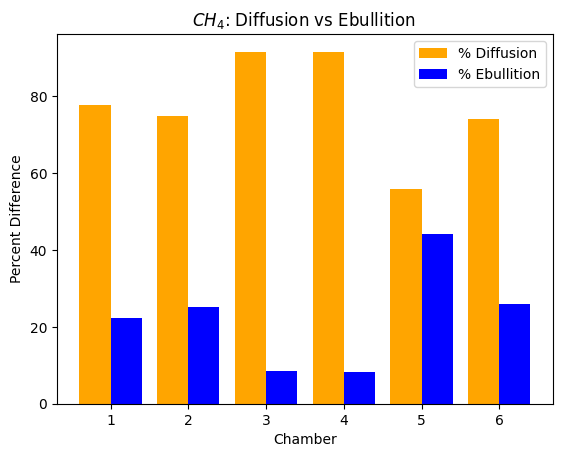

In [18]:
def plot_percent_difference(diff,ebul, title):

    diff_cumulative = diff.groupby(['pond', 'chamber']).agg({'mg_m2_d': 'sum'}).reset_index()
    ebul_cumulative = ebul.groupby(['pond', 'chamber']).agg({'mg_m2_d': 'sum'}).reset_index()

    # Calculate percent differences for d1_d2 and d2_d1
    percent_difference_d_e = (diff_cumulative['mg_m2_d'] / (diff_cumulative['mg_m2_d'] + ebul_cumulative['mg_m2_d'])) * 100
    percent_difference_e_d = (ebul_cumulative['mg_m2_d'] / (diff_cumulative['mg_m2_d'] + ebul_cumulative['mg_m2_d'])) * 100

    # Plot histogram
    width = 0.4  # Width of the bars

    # Create bar positions
    ind = np.arange(len(diff_cumulative['chamber']))

    # Plot the two series as histograms
    plt.bar(ind - width/2, percent_difference_d_e, width, label='% Diffusion', color='orange')
    plt.bar(ind + width/2, percent_difference_e_d, width, label='% Ebullition', color='blue')

    # Add labels and title
    plt.xlabel('Chamber')
    plt.ylabel('Percent Difference')
    plt.title(title)
    plt.xticks(ind, diff_cumulative['chamber'])  # Set x-ticks as chamber numbers
    plt.legend()

plot_percent_difference(ch4_diffusive_daily,ch4_ebullitive_daily, '$CH_4$: Diffusion vs Ebullition ')


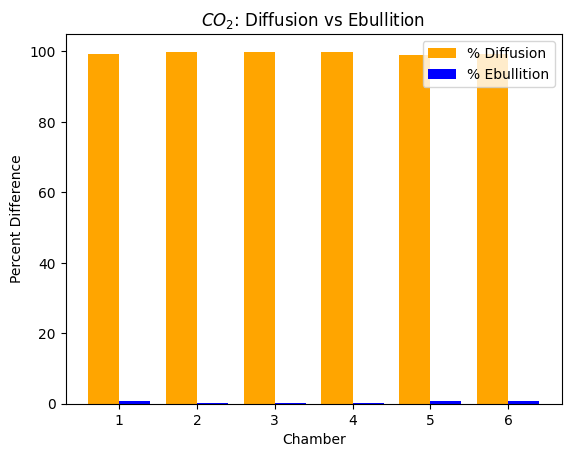

In [19]:
plot_percent_difference(co2_diffusive_daily,co2_ebullitive_daily, '$CO_2$: Diffusion vs Ebullition ')